# SEP 767 Multivariate Statistical Methods for Big Data Analysis and Process Improvement - Project by Prathamesh Joshi

1.Age: This variable bank contains the age information of the customers.

2.Sex: This variable contains the gender information of the bank customers.

3.Job: This variable contains occupational information of bank customers. Professions are divided into four categories according to skill level. (0 - unskilled and nonresident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

4.Housing: This variable includes the housing status of the bank customers.

5.Saving Accounts: This variable bank contains customers savings information.Customers savings are classified as little, moderate, quite rich, rich.

6.Checking Accounts: This variable show the cash in the accounts of bank customers.

7.Credit Amount: This variable shows how much credit the bank customers get.

8.DM :Dustsch Mark is used as currency.

9.Duration: This variable contains the specified time to pay the credit.

10.Purpose: This variable shows the purpose for which the bank customer taking credit. Taking credit by customers are classified as car, furniture / equipment, radio / TV, domestic appliances, repairs, education, business, vacation / others.

11.Risk: This variable contains the customers risk information. Customers in the Data Set have previously taken credit from banks. A value of 1 was given for customers who paid the credit and 0 for customers who could not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import plotly.express as px

In [2]:
df = pd.read_csv('/content/german_credit_data.csv')

In [3]:
df.head()

,id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.shape

(1000, 11)

In [5]:
df.columns

Index(['id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [6]:
# storing id column and dropping it from the dataframe
columns = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk']
id_col = df['id']
df = df.loc[:,columns]

In [7]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [9]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [10]:
df['Checking account'].fillna('no-info', inplace = True)  #making one more label category as dropping them would result in loss of data.
df['Saving accounts'].fillna('no-info', inplace = True)

In [11]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']

for col in cat_cols:
    print(df[col].value_counts(), "\n\n")

male      690
female    310
Name: Sex, dtype: int64 


own     713
rent    179
free    108
Name: Housing, dtype: int64 


little        603
no-info       183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64 


no-info     394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64 


car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64 


good    700
bad     300
Name: Risk, dtype: int64 




In [12]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FETURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())

show_info(df)

DATASET SHAPE:  (1000, 10) 

--------------------------------------------------
FETURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB
None

 --------------------------------------------------
NUMBER OF UNIQUE VALUES PER FEATURE: 

Age                  53
Sex                   2
Job                   4
Housing               3

# some analysis to understand data better


In [13]:
def annot_plot_num(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))
        
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')

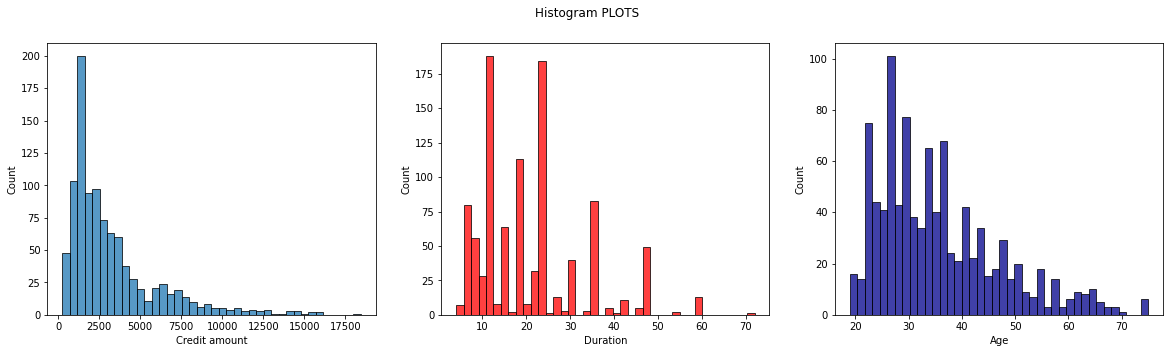

In [14]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('Histogram PLOTS')
sns.histplot(df['Credit amount'], bins=40, ax=ax[0]);
sns.histplot(df['Duration'], bins=40, ax=ax[1], color='red');
sns.histplot(df['Age'], bins=40, ax=ax[2], color='darkblue');

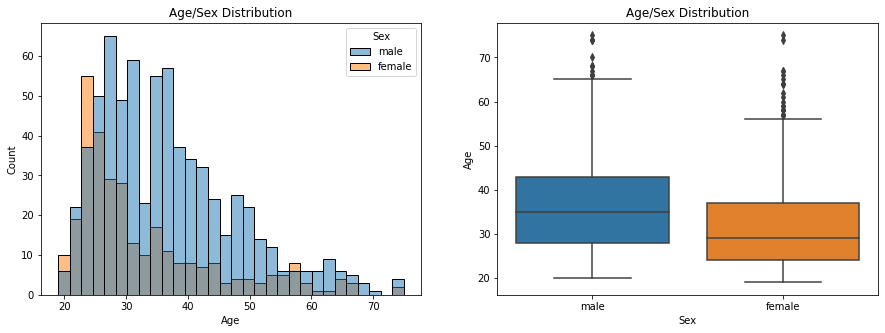

In [15]:
# to understand age better 

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='Age', bins=30, hue="Sex", ax=ax[0]).set_title("Age/Sex Distribution");
sns.boxplot(data=df, x="Sex", y="Age", ax=ax[1]).set_title("Age/Sex Distribution");

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


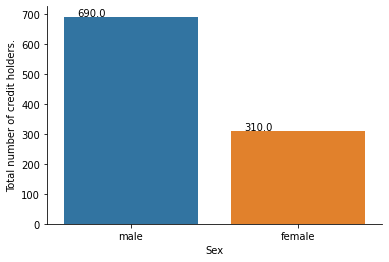

In [16]:
ax = sns.countplot('Sex', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot_num(ax,0.08,1)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


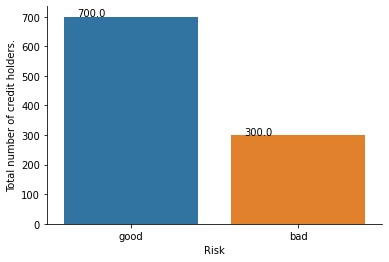

In [17]:
ax = sns.countplot('Risk', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot_num(ax,0.08,1)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


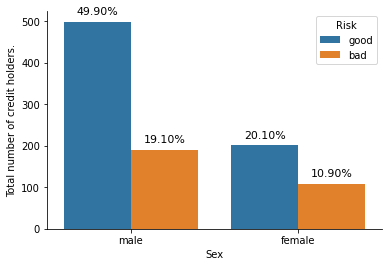

In [18]:
ax = sns.countplot('Sex',hue='Risk', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot(ax,0.08,1)
plt.show()

###### Insight - 

1. Males take more count of credit from Bank.
2. Males have lower percentage of bad rating than woman

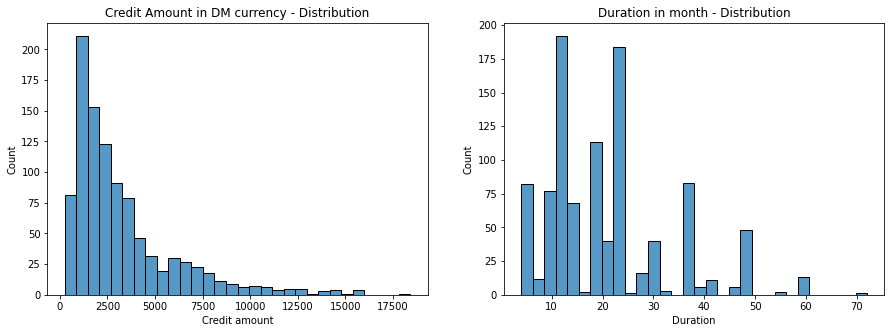

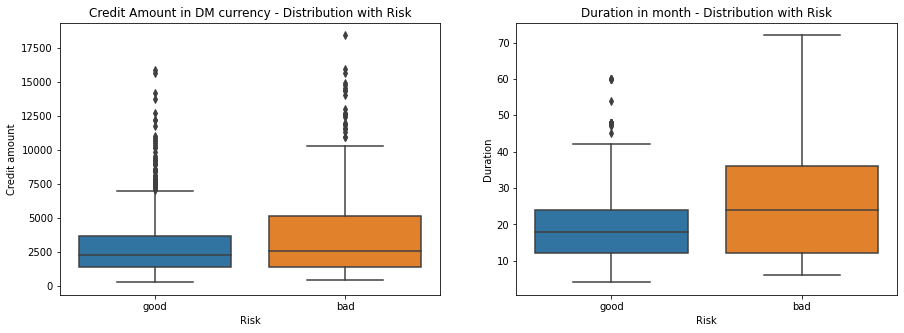

In [19]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='Credit amount', bins=30, ax=ax[0]).set_title("Credit Amount in DM currency - Distribution");
sns.histplot(df, x='Duration', bins=30, ax=ax[1]).set_title("Duration in month - Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df, x='Risk', y='Credit amount', ax=ax[0]).set_title("Credit Amount in DM currency - Distribution with Risk");
sns.boxplot(data=df, x='Risk', y='Duration', ax=ax[1]).set_title("Duration in month - Distribution with Risk");

# Insight - 
1. many peope take credit amount as seen from chart
2. as the amount increase duration is increasing too
3. but as duration is increasing , there is a higher chance bank might not get the loan back, i.e risk is increasing.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


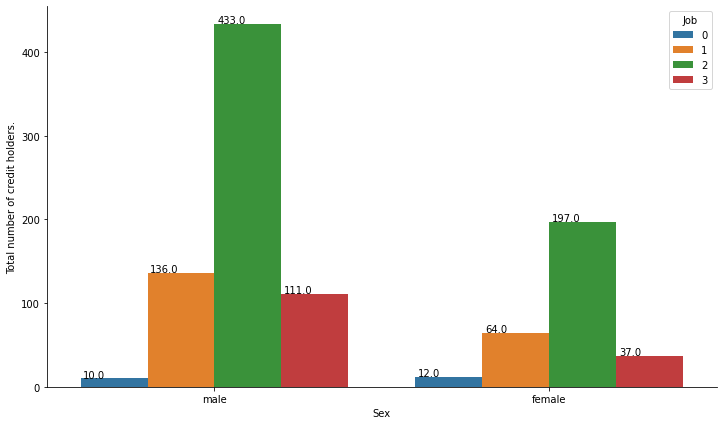

In [20]:
plt.figure(figsize=(12,7))
ax = sns.countplot('Sex',hue='Job', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot_num(ax,0.008,1)
plt.show()

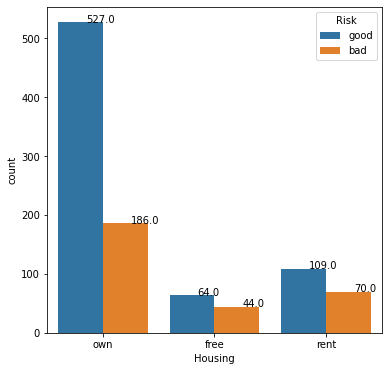

In [21]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x='Housing', hue='Risk', data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) #(referred from stackoverflow)

plt.show()

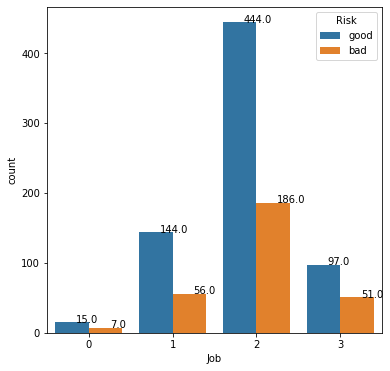

In [22]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x='Job', hue='Risk', data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

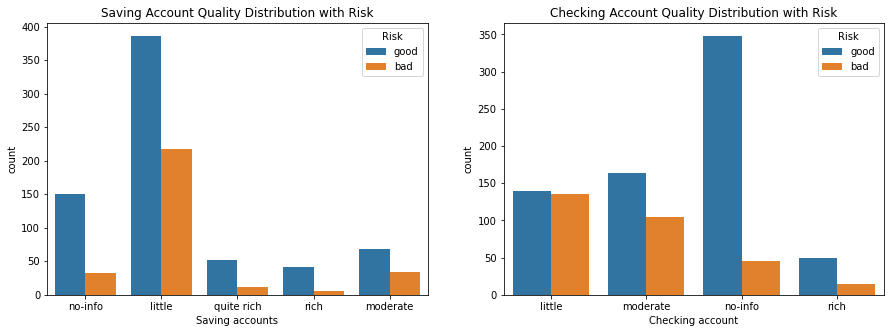

In [23]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x="Saving accounts", hue="Risk", ax=ax[0]).set_title("Saving Account Quality Distribution with Risk");
sns.countplot(data=df, x="Checking account", hue="Risk", ax=ax[1]).set_title("Checking Account Quality Distribution with Risk");

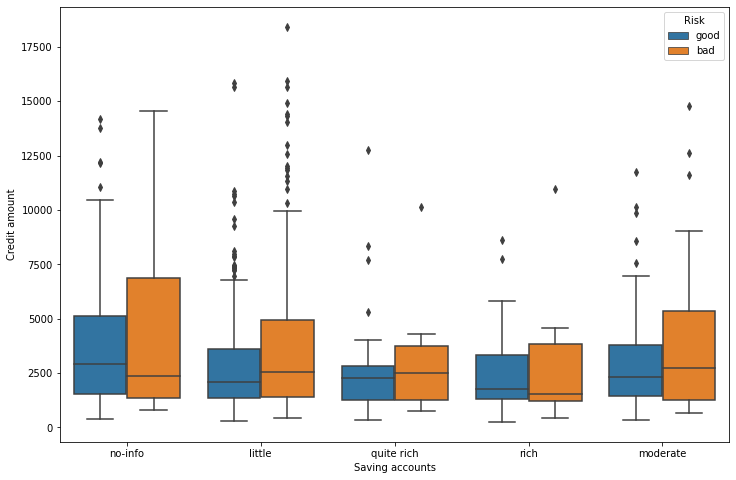

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Saving accounts", y="Credit amount", data=df, hue = "Risk")
plt.show()

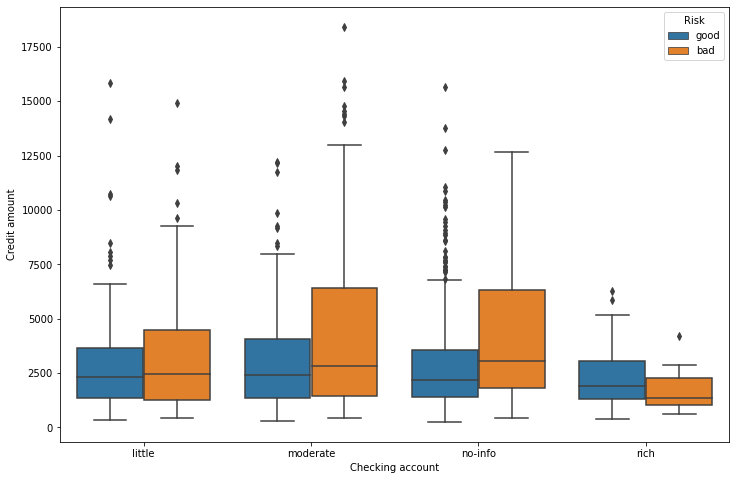

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Checking account", y="Credit amount", data=df, hue = "Risk")
plt.show()

#### Purpose analysis

In [26]:
gender_df = df.groupby(['Purpose','Risk'])['Sex'].value_counts()
gender_df

Purpose              Risk  Sex   
business             bad   male       27
                           female      7
                     good  male       51
                           female     12
car                  bad   male       66
                           female     40
                     good  male      177
                           female     54
domestic appliances  bad   female      2
                           male        2
                     good  female      4
                           male        4
education            bad   male       14
                           female      9
                     good  male       21
                           female     15
furniture/equipment  bad   male       30
                           female     28
                     good  male       77
                           female     46
radio/TV             bad   male       43
                           female     19
                     good  male      152
                       

In [27]:
def categorical_plots(var, data):
  
    #2nd Plot: PIE Chart
    
    labels =var.value_counts().index
    
    a=[0.1]
    for i in range ((len(var.unique()))-1):
        a.append(0)

    explode1= tuple(a)
    plt.figure(figsize=(5,5))
    
    plt.pie(var.value_counts(), labels=labels,autopct='%1.1f%%', shadow=True,explode= explode1 )
    plt.axis('equal')
    plt.xlabel(var.name + ' Distribution')
    plt.legend(loc='Upper left', bbox_to_anchor=(0.7, 0.7, 0.7, 0.7))
        
    show=plt.show()
    
    return(show)

<ipython-input-27-e134bf69d93a>:17: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='Upper left', bbox_to_anchor=(0.7, 0.7, 0.7, 0.7))


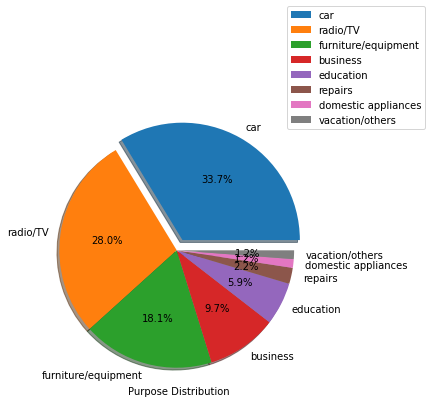

In [28]:
categorical_plots(df.Purpose,df)

The plots clearly show that most of the loan applications are for buying cars. That accounts for 33.7% application. Interestingly the second most common purpose for loan is radio/TV.

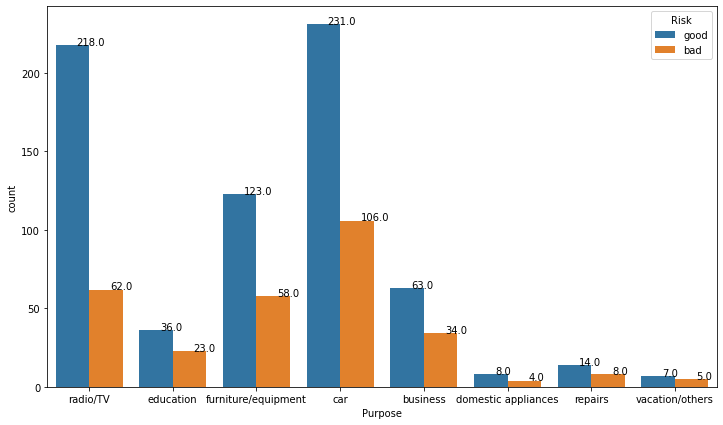

In [29]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x='Purpose', hue='Risk', data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

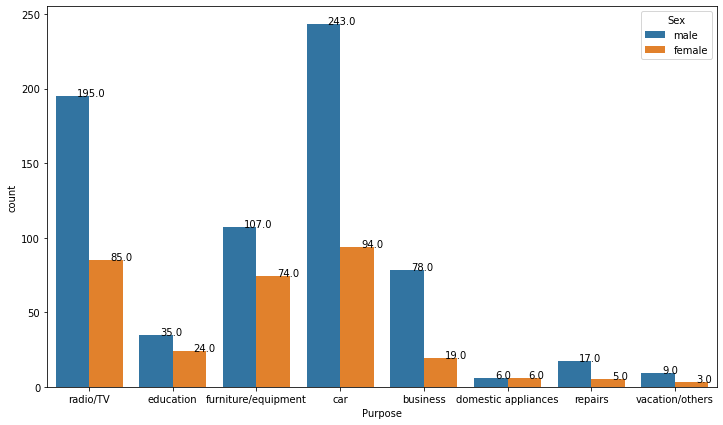

In [33]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x='Purpose', hue='Sex', data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [38]:
trialdf = df.copy()
trialdf.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,no-info,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,no-info,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [39]:
trialdf.Risk = np.where(trialdf.Risk =='good',1,0)
trialdf.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,no-info,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,no-info,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0


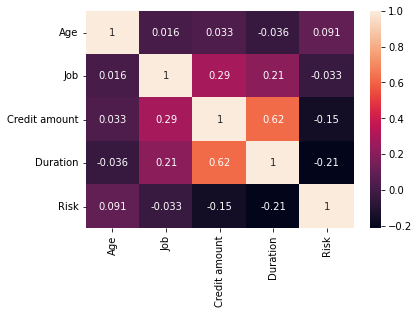

In [40]:
sns.heatmap(trialdf.corr(), annot=True)

1. Credit amount and Duration attributes have a strong postive relationship. Greater the credit amount, greater will be the duration.


2. Credit amount and Duration show a negative correlation with the target variabe Risk i.e. Larger credit loan applications may have higher probabilty of risk compared to smaller.

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Housing'] = le.fit_transform(df['Housing'])
df['Purpose'] = le.fit_transform(df['Purpose'])
df['Risk'] = le.fit_transform(df['Risk'])
df['Saving accounts'] = le.fit_transform(df['Saving accounts'])
df['Checking account'] = le.fit_transform(df['Checking account'])

In [42]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,2,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,2,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


Summary 

1. People aged between 20 to 40 tend to apply for credits more as compared to other age groups. The average of people who apply for loan is 35 years.

2. Males apply for credits/loans more than females. 69% of the people who applied for credit were male, while female were 31%.

3. From 1000 people who applied for loan, highly skilled people were more than 600. That accounts for 63% of the total people who applied for credit.

4. Customers who have their own properties/houses are in greater number who applied for loan.

5. Customers with little savings and little amounts in checking accounts apply for loan more often as compared to people who have better or more savings.

6. Most of the loan applications are for cars. That accounts for 33.7% application. Interestingly the second most common purpose for loan is radio/TV

7. When a loan is taken for a duration greater than 25 months then the probability of being a Bad Risk is high as compared to being Good.

In [44]:
corrdfvis = df.copy()

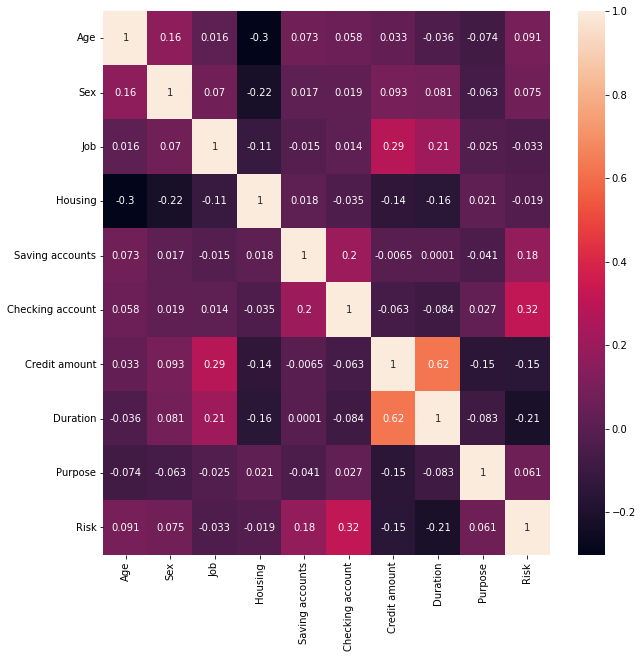

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(corrdfvis.corr(), annot=True)
plt.show()

# PCA

In [46]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [47]:
features = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose']

In [48]:
X = df.loc[:,features]

y = df.loc[:,['Risk']]

print(X.shape)
print(y.shape)

(1000, 9)
(1000, 1)


In [49]:
# Step 1: Standardize the data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [50]:
X = pd.DataFrame(data= X, columns=features)

In [51]:
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,2.766456,0.670280,0.146949,-0.133710,0.955847,-1.344000,-0.745131,-1.236478,1.073263
1,-1.191404,-1.491914,0.146949,-0.133710,-0.706496,-0.265348,0.949817,2.248194,1.073263
2,1.183312,0.670280,-1.383771,-0.133710,-0.706496,0.813303,-0.416562,-0.738668,0.061705
3,0.831502,0.670280,0.146949,-2.016956,-0.706496,-1.344000,1.634247,1.750384,0.567484
4,1.535122,0.670280,0.146949,-2.016956,-0.706496,-1.344000,0.566664,0.256953,-0.949853


##### PCA with 2 components

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform (X)

In [53]:
pcDf = pd.DataFrame(data = principalComponents, columns=['PC1','PC2']) 
pcDf.head()

,PC1,PC2
0,-0.536581,2.121703
1,1.151461,-2.346665
2,-0.808558,1.486696
3,2.897207,0.057036
4,1.850461,1.165030


In [54]:
pcDf_final = pd.concat([pcDf, df[['Risk']]], axis = 1)
pcDf_final.head()

,PC1,PC2,Risk
0,-0.536581,2.121703,1
1,1.151461,-2.346665,0
2,-0.808558,1.486696,1
3,2.897207,0.057036,1
4,1.850461,1.165030,0


In [55]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


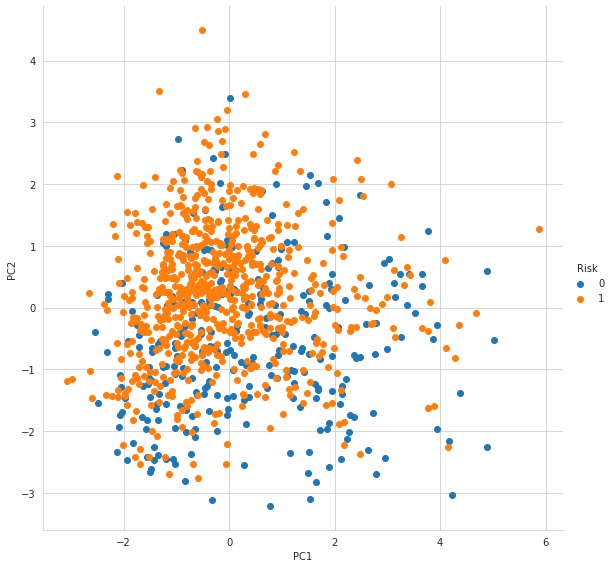

In [56]:
sns.set_style("whitegrid");
sns.FacetGrid(pcDf_final, hue="Risk", size=8) \
  .map(plt.scatter, "PC1", "PC2") \
 .add_legend();

In [57]:
pca.explained_variance_ratio_

array([0.21666756, 0.15714864])

In [58]:
sum(pca.explained_variance_ratio_)

0.3738162048504894

##### PCA with 3 components


In [59]:
pca_1 = PCA(n_components=3)
principalComponents_1 = pca_1.fit_transform(X)

In [60]:
pcDf_1 = pd.DataFrame(data = principalComponents_1, columns=['PC1','PC2','PC3']) 
pcDf_1.head()

,PC1,PC2,PC3
0,-0.536581,2.121703,-1.203952
1,1.151461,-2.346665,0.253069
2,-0.808558,1.486696,-0.758179
3,2.897207,0.057036,-1.695903
4,1.850461,1.165030,-2.052197


In [61]:
pcDf_1_final = pd.concat([pcDf_1, df[['Risk']]], axis = 1)
pcDf_1_final.head()

,PC1,PC2,PC3,Risk
0,-0.536581,2.121703,-1.203952,1
1,1.151461,-2.346665,0.253069,0
2,-0.808558,1.486696,-0.758179,1
3,2.897207,0.057036,-1.695903,1
4,1.850461,1.165030,-2.052197,0


In [62]:
pca_1.explained_variance_ratio_

array([0.21666756, 0.15714864, 0.12857497])

In [63]:
sum(pca_1.explained_variance_ratio_)

0.5023911780108355

In [64]:
my_color=df['Risk']
my_color

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

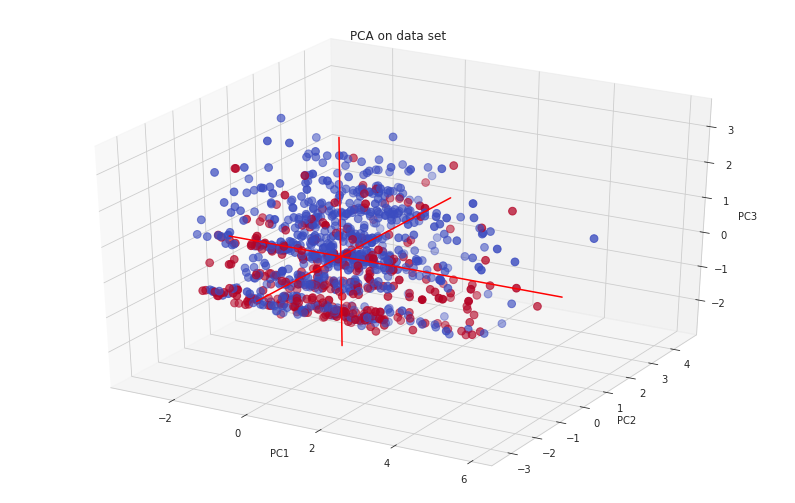

In [65]:
# Plot initialisation
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pcDf_1['PC1'], pcDf_1['PC2'], pcDf_1['PC3'], c = my_color,cmap="coolwarm_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(pcDf_1['PC1']), max(pcDf_1['PC1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(pcDf_1['PC2']), max(pcDf_1['PC2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(pcDf_1['PC3']), max(pcDf_1['PC3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on data set")
plt.show()

##### PCA with 5 -7 components


In [66]:
pca_2 = PCA(n_components=7)
principalComponents_2 = pca_2.fit_transform(X)

In [67]:
pcDf_2 = pd.DataFrame(data = principalComponents_2, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7']) 
pcDf_2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.536581,2.121703,-1.203952,0.250195,0.743649,0.303601,2.403770
1,1.151461,-2.346665,0.253069,1.232846,1.326862,0.161107,-0.760142
2,-0.808558,1.486696,-0.758179,-0.269251,0.250938,-0.267851,-1.070221
3,2.897207,0.057036,-1.695903,0.623460,1.313375,-0.317518,0.040774
4,1.850461,1.165030,-2.052197,-0.793020,0.423994,0.593500,0.269726


In [68]:
pca_2.explained_variance_ratio_

array([0.21666756, 0.15714864, 0.12857497, 0.11200901, 0.09432997,
       0.09354757, 0.08568509])

In [69]:
sum(pca_2.explained_variance_ratio_)

0.8879628224022859

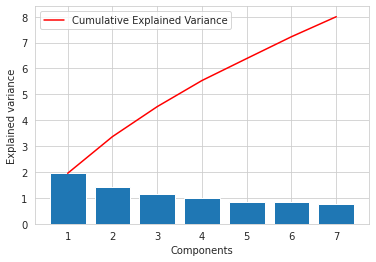

In [70]:
plt.bar(range(1,len(pca_2.explained_variance_ )+1),pca_2.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca_2.explained_variance_ )+1),
         np.cumsum(pca_2.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

In [71]:
loadings = pd.DataFrame(data=pca_2.components_.T * np.sqrt(pca_2.explained_variance_), 
                        columns=[f'PC{i}' for i in range(1, len(pcDf_2.columns) + 1)])                        

loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.223267,0.682471,-0.213811,-0.097305,0.251704,0.341388,0.162584
1,0.341349,0.443977,-0.234432,-0.015616,-0.424456,-0.660076,0.053042
2,0.500822,-0.104740,0.135326,0.356535,-0.548403,0.399046,0.358007
3,-0.452318,-0.521347,0.306436,-0.190516,-0.195067,-0.118830,0.150372
4,-0.005864,0.337698,0.717307,-0.124062,0.235096,-0.197699,0.479955


In [72]:
pca2_loadings_1 = pca_2.components_.T * np.sqrt(pca_2.explained_variance_)

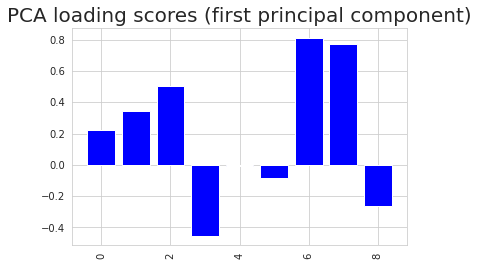

In [73]:
pca2_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]

pca2_loadings = pca2_loadings.reset_index()

pca2_loadings.columns = ['Attribute', 'CorrelationWithPC1']



plt.bar(x=pca2_loadings['Attribute'], height=pca2_loadings['CorrelationWithPC1'], color='#0000FF')

plt.title('PCA loading scores (first principal component)', size=20)

plt.xticks(rotation='vertical')

plt.show()


fig = px.scatter(principalComponents_2, x=0, y=1, color=df['Risk'])

for i, feature in enumerate(X.columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=pca2_loadings_1[i, 0],
        y1=pca2_loadings_1[i, 1]
    )
    fig.add_annotation(
        x=pca2_loadings_1[i, 0],
        y=pca2_loadings_1[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

# We cannot choose the above data for train-test split as transformation is now applied on whole X data

In [79]:
X1 = df.loc[:,features]
y1 = df.loc[:,['Risk']]

In [80]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV 
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size = 0.25, random_state = 42, stratify=y1)

In [81]:
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [82]:
print("X train shape", X_train.shape)
print("X test shape", X_test.shape)
print("y train shape", y_train.shape)
print("y test shape", y_test.shape)

X train shape (750, 9)
X test shape (250, 9)
y train shape (750, 1)
y test shape (250, 1)


In [83]:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, plot_roc_curve,roc_auc_score,roc_curve, confusion_matrix, classification_report, f1_score, precision_score

# Classification

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [85]:
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC
from yellowbrick.features import FeatureImportances



def visualize(model):

    
    fig, axes = plt.subplots(1, 2,figsize=(10,5))
    fig.subplots_adjust(bottom=0.5, wspace=0.5)
    
    visualgrid = [
        #FeatureImportances(model,ax=axes[0][0]),
        ROCAUC(model, ax=axes[1],cmap='coolwarm'),
        #ConfusionMatrix(model,cmap='PuOr', ax=axes[2]),
        ClassificationReport(model, cmap='PuRd',ax=axes[0])
        
    ]

    for viz in visualgrid:
        viz.fit(X_train, y_train)
        viz.score(X_test, y_test)
        viz.finalize()

    plt.show()

## Logistic Regression

In [86]:
model = LogisticRegression()
start_time = time.time()
model.fit(X_train,y_train)
elapsed_time = time.time() - start_time

print("Training Time  LG  : {:.2}".format(elapsed_time))

start_time1 = time.time()
predictions=model.predict(X_test)
elapsed_time1 = time.time() - start_time
print("Testing Time  LG  : {:.2}".format(elapsed_time1))


probabilities = model.predict_proba(X_test)

Training Time  LG  : 0.015
Testing Time  LG  : 0.016


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [87]:
print ("\n Classification report : \n",classification_report(y_test,predictions))
print ("Train Accuracy Score   : ",accuracy_score(y_train,model.predict(X_train)))
print ("Test Accuracy Score   : ",accuracy_score(y_test,predictions))
model_roc_auc = roc_auc_score(y_test,predictions) 
print ("Area under curve : ",model_roc_auc)


 Classification report : 
               precision    recall  f1-score   support

           0       0.64      0.31      0.41        75
           1       0.76      0.93      0.83       175

    accuracy                           0.74       250
   macro avg       0.70      0.62      0.62       250
weighted avg       0.72      0.74      0.71       250

Train Accuracy Score   :  0.732
Test Accuracy Score   :  0.74
Area under curve :  0.6161904761904762


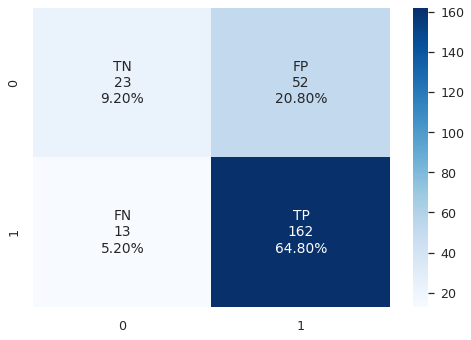

In [89]:
sconf_matrix_lg = confusion_matrix(y_test, predictions)

categories = ['Zero', 'One']

group_names = ['TN', 'FP', 'FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_lg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix_lg.flatten()/np.sum(conf_matrix_lg)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.set(font_scale=1.15)
sns.heatmap(conf_matrix_lg, annot=labels, fmt='', cmap='Blues')

Area under curve :  0.6161904761904762


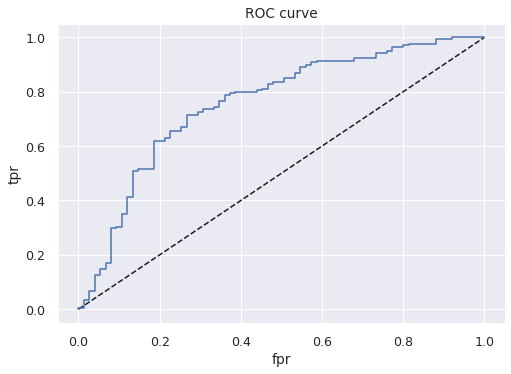

In [90]:
model_roc_auc = roc_auc_score(y_test,predictions) 
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='LogisticRegression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",model_roc_auc)
plt.show()

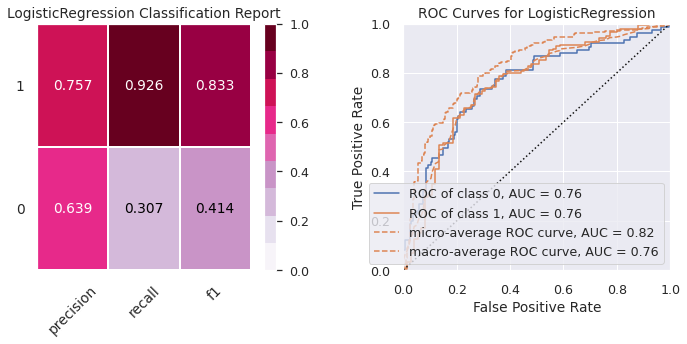

In [91]:
visualize(model)

## KNN

In [75]:
knn = KNeighborsClassifier(n_neighbors=15)
#Train the model using the training sets 
start_time2 = time.time()
knn.fit(X_train, y_train)
elapsed_time2 = time.time()-start_time2
print("Training time KNN   -- ", elapsed_time2)


#Predict the response for test dataset
start_time3 = time.time()
predictionsknn  = knn.predict(X_test)
elapsed_time3 = time.time()-start_time3
print("Testing time KNN   ---", elapsed_time3)

probabilitiesknn = knn.predict_proba(X_test)
fpr,tpr,thresholds = roc_curve(y_test,probabilitiesknn[:,1])

Training time KNN   --  0.0043528079986572266
Testing time KNN   --- 0.018424510955810547


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [76]:
print ("\n Classification report : \n",classification_report(y_test,predictionsknn))
print ("Train Accuracy Score   : ",accuracy_score(y_train,knn.predict(X_train)))
print ("Test Accuracy Score   : ",accuracy_score(y_test,predictionsknn))
knn_roc_auc = roc_auc_score(y_test,predictionsknn) 
print ("Area under curve : ",knn_roc_auc)


 Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.29      0.42        75
           1       0.76      0.95      0.84       175

    accuracy                           0.75       250
   macro avg       0.73      0.62      0.63       250
weighted avg       0.74      0.75      0.71       250

Train Accuracy Score   :  0.7466666666666667
Test Accuracy Score   :  0.752
Area under curve :  0.6209523809523809


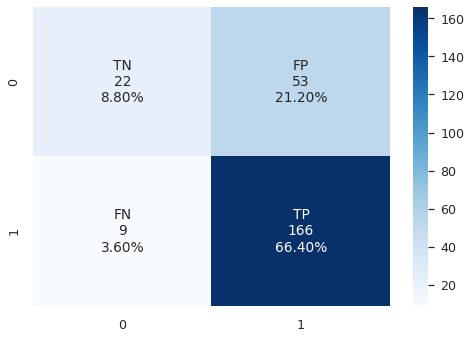

In [77]:
conf_matrix_knn = confusion_matrix(y_test, predictionsknn)

categories = ['Zero', 'One']

group_names = ['TN', 'FP', 'FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix_knn.flatten()/np.sum(conf_matrix_knn)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.set(font_scale=1.15)
sns.heatmap(conf_matrix_knn, annot=labels, fmt='', cmap='Blues')

Area under curve :  0.6209523809523809


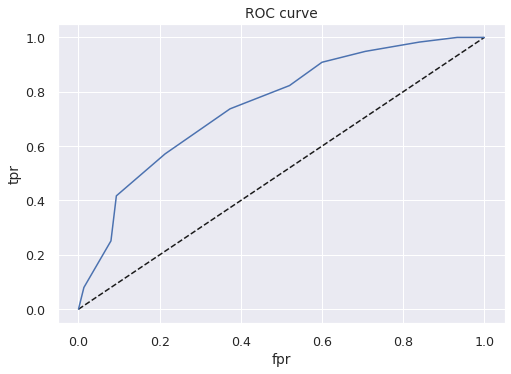

In [78]:
y_pred_proba_knn = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",knn_roc_auc)
plt.show()

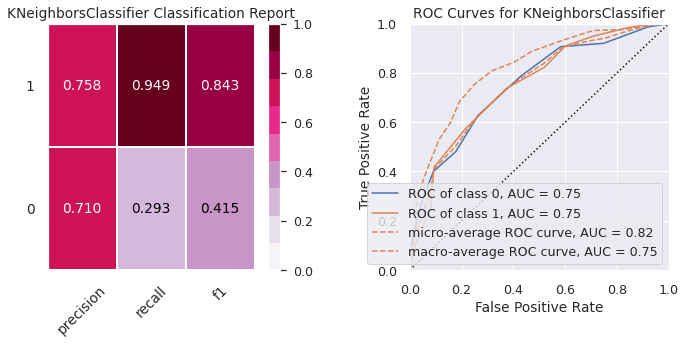

In [79]:
visualize(knn)

## Decision Tree Classifier

In [80]:
from sklearn import tree
from sklearn.tree import plot_tree

In [81]:
dtc=DecisionTreeClassifier(criterion="entropy", max_depth=6)
start_time4 = time.time()
dtc.fit(X_train,y_train)
elapsed_time4 = time.time() - start_time4
print("Training time DTC ---- ", elapsed_time4)

Training time DTC ----  0.007174968719482422


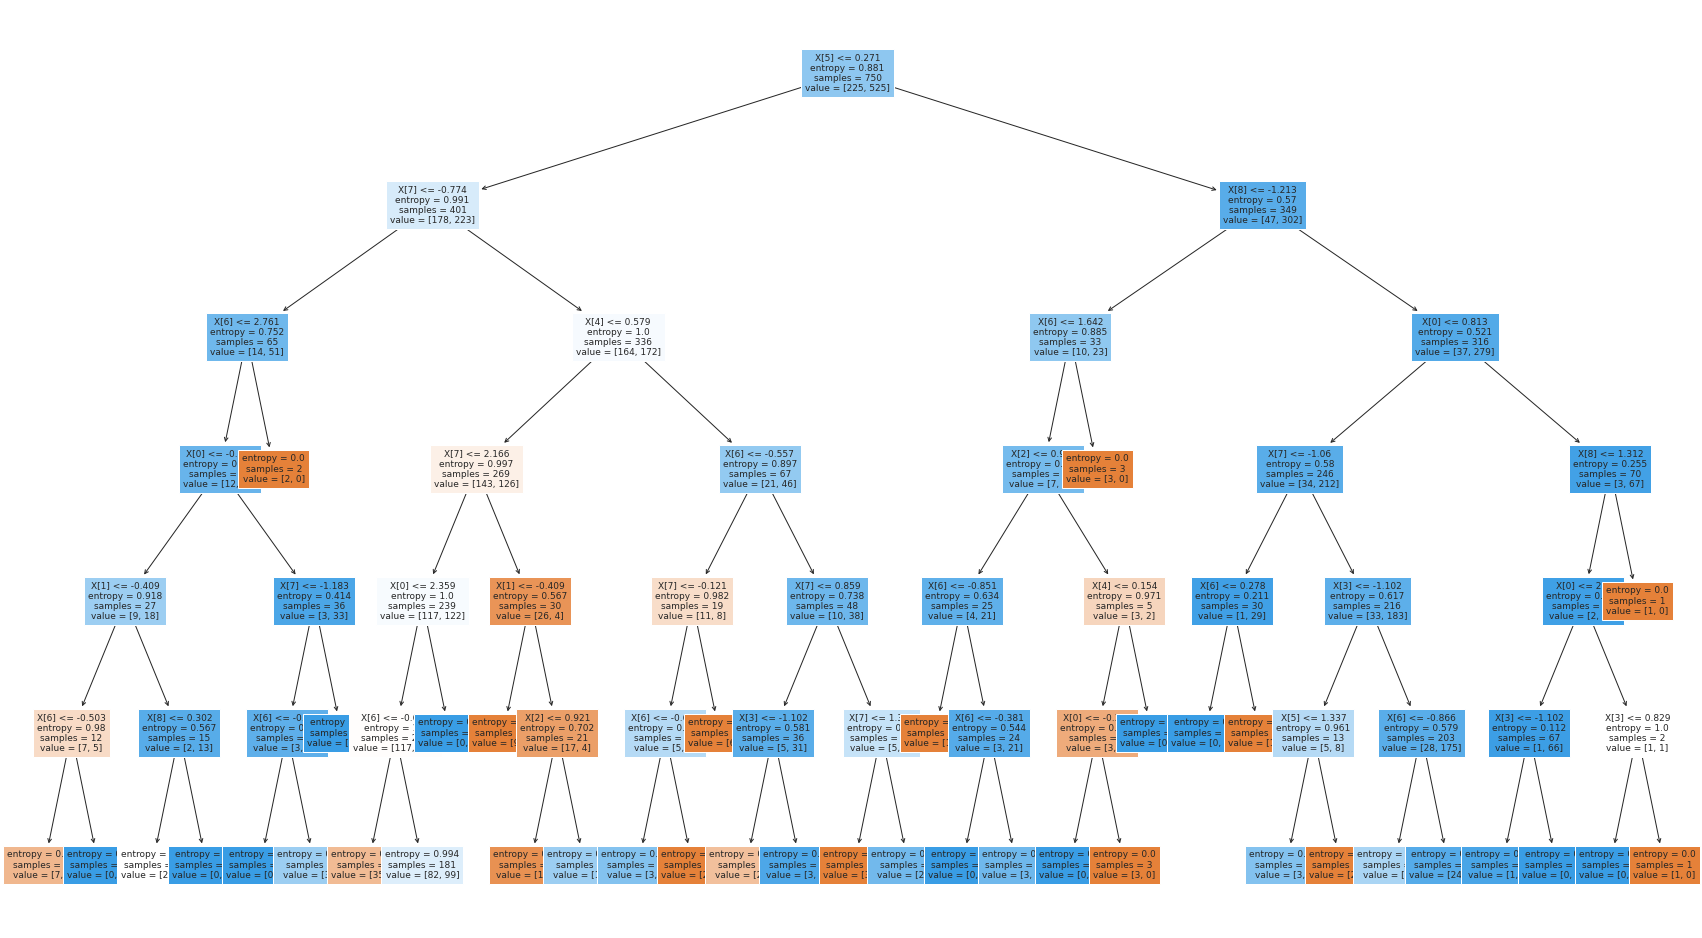

In [82]:
plt.figure(figsize=(30,17))
plot_tree(dtc,fontsize=9,filled=True)
plt.show()

In [83]:
start_time5= time.time()
predictionsdtc = dtc.predict(X_test)
elapsed_time5 = time.time() - start_time5
print("Testing time DTC ---- ", elapsed_time5)

Testing time DTC ----  0.0007274150848388672


In [84]:
print ("\n Classification report : \n",classification_report(y_test,predictionsdtc))
print ("Train Accuracy Score   : ",accuracy_score(y_train,dtc.predict(X_train)))
print ("Test Accuracy Score   : ",accuracy_score(y_test,predictionsdtc))
dtc_roc_auc = roc_auc_score(y_test,predictionsdtc) 
print ("Area under curve : ",dtc_roc_auc)


 Classification report : 
               precision    recall  f1-score   support

           0       0.47      0.20      0.28        75
           1       0.72      0.90      0.80       175

    accuracy                           0.69       250
   macro avg       0.60      0.55      0.54       250
weighted avg       0.65      0.69      0.65       250

Train Accuracy Score   :  0.796
Test Accuracy Score   :  0.692
Area under curve :  0.5514285714285714


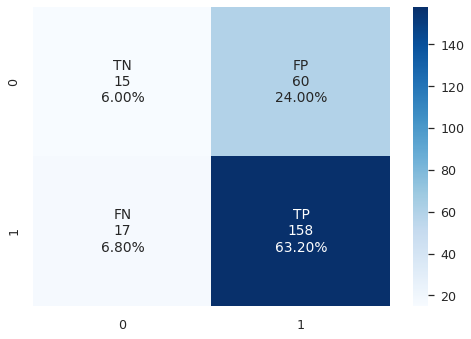

In [85]:
conf_matrix_dtc = confusion_matrix(y_test, predictionsdtc)

categories = ['Zero', 'One']

group_names = ['TN', 'FP', 'FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_dtc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix_dtc.flatten()/np.sum(conf_matrix_dtc)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.set(font_scale=1.15)
sns.heatmap(conf_matrix_dtc, annot=labels, fmt='', cmap='Blues')

Area under curve :  0.5514285714285714


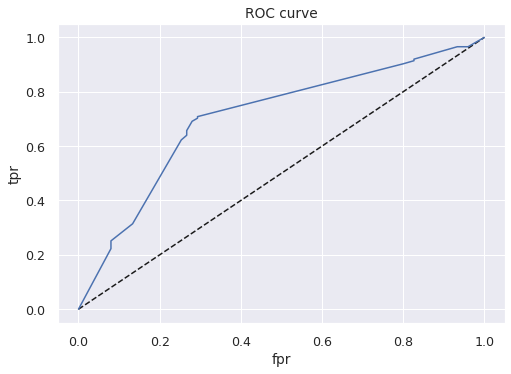

In [86]:
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_dtc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='DTC')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",dtc_roc_auc)
plt.show()

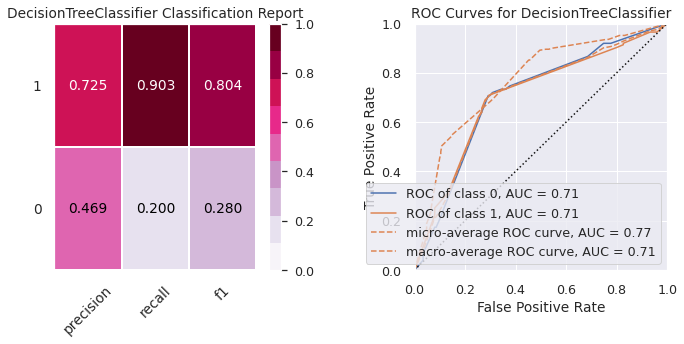

In [87]:
visualize(dtc)

## Random Forest Classifier

In [88]:
rfc = RandomForestClassifier()
start_time6 = time.time()
rfc.fit(X_train, y_train);
elapsed_time6 = time.time() - start_time6
print("Training time RFC ---- ", elapsed_time6)

#Prediction
start_time7 = time.time()
predictionsrfc = rfc.predict(X_test)
elapsed_time7 = time.time() - start_time7
print("Testing time RFC ---- ", elapsed_time7)


probabilitiesrfc = rfc.predict_proba(X_test)
fpr,tpr,thresholds = roc_curve(y_test,probabilitiesrfc[:,1])

<ipython-input-88-461bd30f7217>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training time RFC ----  0.19861459732055664
Testing time RFC ----  0.01995229721069336


In [89]:
print ("\n Classification report : \n",classification_report(y_test,predictionsrfc))
print ("Train Accuracy Score   : ",accuracy_score(y_train,rfc.predict(X_train)))
print ("Test Accuracy Score   : ",accuracy_score(y_test,predictionsrfc))
rfc_roc_auc = roc_auc_score(y_test,predictionsrfc) 
print ("Area under curve : ",rfc_roc_auc)


 Classification report : 
               precision    recall  f1-score   support

           0       0.65      0.47      0.54        75
           1       0.80      0.89      0.84       175

    accuracy                           0.76       250
   macro avg       0.72      0.68      0.69       250
weighted avg       0.75      0.76      0.75       250

Train Accuracy Score   :  1.0
Test Accuracy Score   :  0.764
Area under curve :  0.6790476190476191


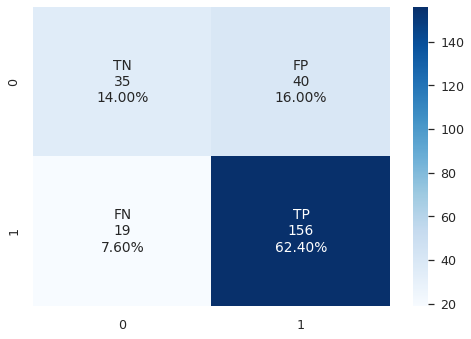

In [90]:
conf_matrix_rfc = confusion_matrix(y_test, predictionsrfc)

categories = ['Zero', 'One']

group_names = ['TN', 'FP', 'FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_rfc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix_rfc.flatten()/np.sum(conf_matrix_rfc)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.set(font_scale=1.15)
sns.heatmap(conf_matrix_rfc, annot=labels, fmt='', cmap='Blues')

Area under curve :  0.6790476190476191


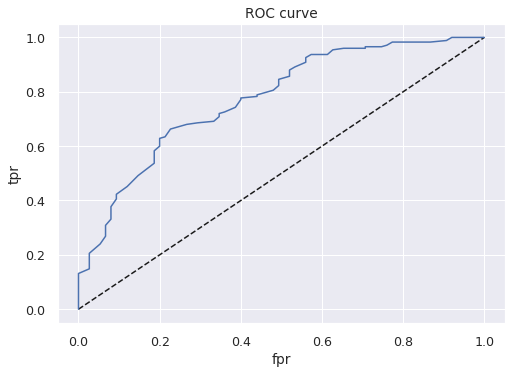

In [91]:
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rfc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='RFC')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",rfc_roc_auc)
plt.show()

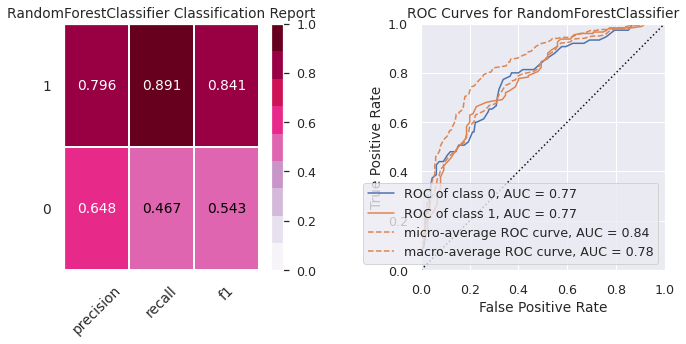

In [92]:
visualize(rfc)

## XGBoost Classifier

In [93]:
xgb  = XGBClassifier()
start_time8 = time.time()
xgb.fit(X_train, y_train);
elapsed_time8 = time.time() - start_time8
print("Training time XGBC ---- ", elapsed_time8)


#Prediction
start_time9 = time.time()
predictionsxgb = xgb.predict(X_test)
elapsed_time9 = time.time() - start_time9
print("Testing time XGBC ----", elapsed_time9)

probabilitiesxgb = xgb.predict_proba(X_test)
fpr,tpr,thresholds = roc_curve(y_test,probabilitiesxgb[:,1])

Training time XGBC ----  0.1529541015625
Testing time XGBC ---- 0.0030107498168945312


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [94]:
print ("\n Classification report : \n",classification_report(y_test,predictionsxgb))
print ("Train Accuracy Score   : ",accuracy_score(y_train,xgb.predict(X_train)))
print ("Test Accuracy Score   : ",accuracy_score(y_test,predictionsxgb))
xgb_roc_auc = roc_auc_score(y_test,predictionsxgb) 
print ("Area under curve : ",xgb_roc_auc)


 Classification report : 
               precision    recall  f1-score   support

           0       0.74      0.43      0.54        75
           1       0.79      0.94      0.86       175

    accuracy                           0.78       250
   macro avg       0.77      0.68      0.70       250
weighted avg       0.78      0.78      0.76       250

Train Accuracy Score   :  0.864
Test Accuracy Score   :  0.784
Area under curve :  0.681904761904762


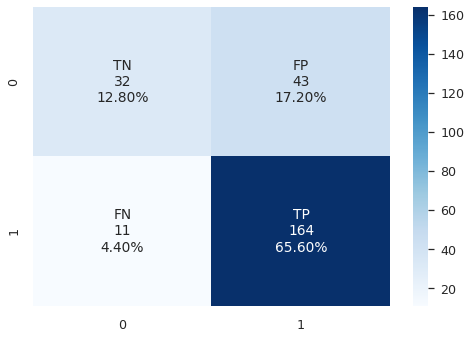

In [95]:
conf_matrix_xgb = confusion_matrix(y_test, predictionsxgb)

categories = ['Zero', 'One']

group_names = ['TN', 'FP', 'FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_xgb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix_xgb.flatten()/np.sum(conf_matrix_xgb)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.set(font_scale=1.15)
sns.heatmap(conf_matrix_xgb, annot=labels, fmt='', cmap='Blues')

Area under curve :  0.681904761904762


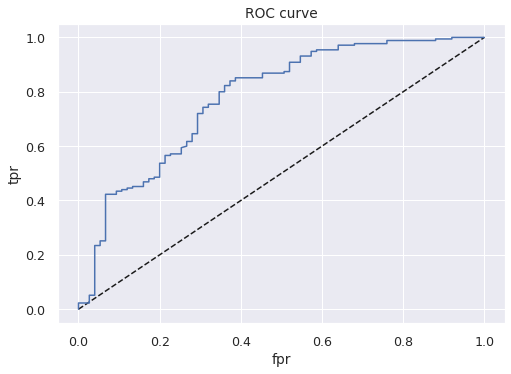

In [96]:
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgb)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='XGB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",xgb_roc_auc)
plt.show()

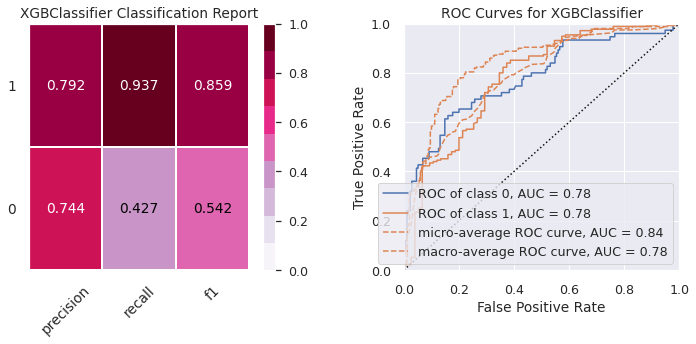

In [97]:
visualize(xgb)

# Feature importance

In [98]:
print('f1_score:', f1_score(y_test, rfc.predict(X_test)))

f1_score: 0.8409703504043127


In [99]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,2,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,2,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


In [100]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [101]:
features = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose']

In [102]:
XX1 = df.loc[:,features]
yy1 = df.loc[:,['Risk']]

print(XX1.shape)
print(yy1.shape)

(1000, 9)
(1000, 1)


In [103]:
XX1_train, XX1_test, yy1_train, yy1_test = train_test_split(XX1,yy1, test_size = 0.25, random_state = 42)

In [104]:
feature_importance = pd.DataFrame()
feature_importance["feature"] = pd.DataFrame(data=XX1_train).columns
feature_importance["importance"] = rfc.feature_importances_
feature_importance = feature_importance.sort_values("importance", ascending=False)
feature_importance

,feature,importance
6,Credit amount,0.248634
0,Age,0.178579
7,Duration,0.160730
5,Checking account,0.128427
8,Purpose,0.094517
4,Saving accounts,0.063186
2,Job,0.048237
3,Housing,0.046050
1,Sex,0.031638


In [105]:
feature_importance_xgb = pd.DataFrame()
feature_importance_xgb["feature"] = pd.DataFrame(data=XX1_train).columns
feature_importance_xgb["importance"] = xgb.feature_importances_
feature_importance_xgb = feature_importance_xgb.sort_values("importance", ascending=False)
feature_importance_xgb

,feature,importance
5,Checking account,0.412734
7,Duration,0.105873
6,Credit amount,0.085121
4,Saving accounts,0.077524
1,Sex,0.072554
0,Age,0.066395
3,Housing,0.065942
8,Purpose,0.057584
2,Job,0.056273


#### ANALYZING THE RESULTS
So now we have to decide which one is the best model, and we have two types of wrong values:

1. False Positive, means they won't pay the loan(Risk:Yes), but the model thinks they will.
2. False Negative, means they will pay the loan(Risk:No), but the model said they won't.

#### In my opinion:
Length of the dataset isn't enough, we need more data for better accuracy.

# comparing model accuracies

In [110]:
all_Accuracies = {'Classifiers': ['Logistic Regression', 'KNN', 'Decison Tree Classifier', 'Random Forest Classifier', 'XGBoost Classifier'],
        'Test Accuracy': [accuracy_score(y_test,predictions),accuracy_score(y_test,predictionsknn), accuracy_score(y_test,predictionsdtc),
                          accuracy_score(y_test,predictionsrfc),accuracy_score(y_test,predictionsxgb)]}

In [111]:
accuracy_df = pd.DataFrame(data=all_Accuracies)
accuracy_df.sort_values(by = 'Test Accuracy')

,Classifiers,Test Accuracy
2,Decison Tree Classifier,0.692
0,Logistic Regression,0.740
1,KNN,0.752
3,Random Forest Classifier,0.764
4,XGBoost Classifier,0.784
